In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import random

### 1.
- (a) For two integers $n$, $m$, calculate
$${n \choose m} = \frac{n!}{(n-m)!m!}$$
- (b) Evaluate
$${52 \choose 23}$$

In [2]:
def MyCombination(n, m):
    numer = math.factorial(n)
    denom = math.factorial(m) * math.factorial(n-m)
    return numer / denom

In [3]:
MyCombination(52, 23)

352870329957600.0

### 2. 

Save the following data in a csv file and find the followings.

|LSAT|GPA|
|-|-|
|576|339|
|635|330|
|558|281|
|578|303|
|666|344|
|580|307|
|555|300|
|661|343|

(a) Print two lists of numbers stored in the csv file.

In [4]:
df = pd.read_csv('C:/TA_SDAclass/data/HW1_data.csv')
print(df['LSAT'].to_list())
print(df['GPA'].to_list())

[576, 635, 558, 578, 666, 580, 555, 661]
[339, 330, 281, 303, 344, 307, 300, 343]


(b) Draw scatter plot of the two lists of numbers.

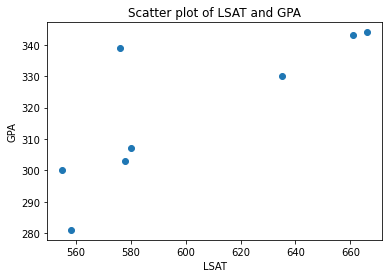

In [5]:
# plt.plot(df['LSAT'], df['GPA'], 'o')
plt.scatter(df['LSAT'], df['GPA'])
plt.xlabel('LSAT')
plt.ylabel('GPA')
plt.title('Scatter plot of LSAT and GPA')
plt.show()

(c) Find correlation coefficient of the two lists of numbers.

In [6]:
print(df.corr().iloc[0, 1])
print(np.corrcoef(df['LSAT'], df['GPA'])[0][1])
print(scipy.stats.pearsonr(df['LSAT'], df['GPA'])[0])

0.8032780125706327
0.8032780125706327
0.8032780125706328


### 3.
Note that a Geometric distributed random variable X with parameter $p$ has its pmf
$p(X=k)=p(1-p)^{(k-1)},\ k=1,2...$

(a) Generate N random numbers of Geometric distribution with parameter $p$ and verify that its sample mean is approximately equal to $\frac{1}{p}$.

In [7]:
print(np.random.geometric(0.5, 10).mean())
print(np.random.geometric(0.5, 100).mean())
print(np.random.geometric(0.5, 1000).mean())
print(np.random.geometric(0.5, 10000).mean())
print(1 / 0.5)

2.2
1.75
2.049
1.9935
2.0


(b) Plot the graphs of pmf and cdf of Geometric distribution with parameter $p=0.4$.

In [8]:
def pmf_geom(p):
    geom = [p*(1-p)**(i-1) for i in range(1, 11)]
    plt.plot(range(1, 11), geom, 'o')
    plt.vlines(range(1, 11), 0, geom)
    plt.xlabel('k')
    plt.ylabel('Prob')
    plt.title('Pmf of geometric')
    plt.show()

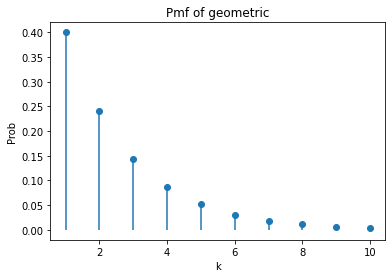

In [9]:
pmf_geom(0.4)

In [10]:
def cdf_geom(p):
    geom = [p*(1-p)**(i-1) for i in range(1, 11)]
    temp = 0
    geom_cum = []
    for i in geom:
        temp += i
        geom_cum.append(temp)
    plt.plot(range(1, 11), geom_cum, 'o')
    plt.vlines(range(1, 11), 0, geom_cum)
    plt.xlabel('k')
    plt.ylabel('Prob')
    plt.title('Cdf of geometric')
    plt.show()

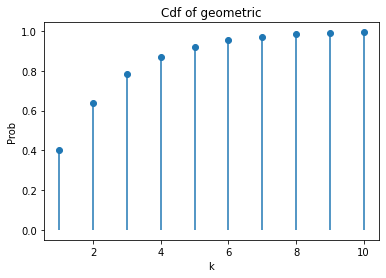

In [11]:
cdf_geom(0.4)

You can also use `scipy.stats`

### 4.
Consider the following probability distribution.

| numbers     | 0   | 1   | 2   | 3   | 4   | 5   | sum |
|-------------|-----|-----|-----|-----|-----|-----|-----|
| probability | 0.1 | 0.1 | 0.2 | 0.2 | 0.3 | 0.1 | 1   |

(a) Generate 10000 random numbers with the probability distribution and make the frequency table in increasing order of numbers.

In [12]:
numbers = list(range(6))
prob = [0.1, 0.1, 0.2, 0.2, 0.3, 0.1]

sample = random.choices(numbers, prob, k=10000)
freq = [sample.count(i) for i in set(sample)]

print('numbers', 'frequencies')
for i, j in zip(numbers, freq):
    print(i, j)

numbers frequencies
0 1047
1 996
2 2026
3 2018
4 2953
5 960


You can also use `Counter` library.

(b) Find mean of the 10000 random numbers and compare the theoretical mean of the probability distribution.

In [13]:
print(np.mean(sample))
print(0*0.1 + 1*0.1 + 2*0.2 + 3*0.2 + 4*0.3 + 5*0.1)

2.7714
2.8


(c) Plot the pie graph of the data in the frequency table in (a).

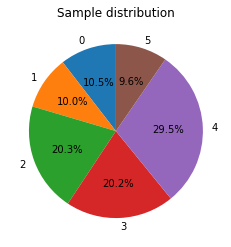

In [14]:
plt.pie(freq, labels=numbers, autopct='%1.1f%%', startangle=90)
_ = plt.title('Sample distribution')